In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
df = pd.read_csv('bank-full.csv', sep = ";")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [296]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [297]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [298]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [299]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [300]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [301]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [302]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [303]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [304]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [305]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [306]:
df['day'].value_counts(ascending =True)

1      322
24     447
10     524
31     643
25     840
22     905
23     939
26    1035
3     1079
27    1121
2     1293
16    1415
4     1445
11    1479
9     1561
30    1566
13    1585
12    1603
15    1703
29    1745
19    1757
7     1817
28    1830
8     1842
14    1848
5     1910
6     1932
17    1939
21    2026
18    2308
20    2752
Name: day, dtype: int64

In [307]:
df['month'].value_counts(ascending =True)

dec      214
mar      477
sep      579
oct      738
jan     1403
feb     2649
apr     2932
nov     3970
jun     5341
aug     6247
jul     6895
may    13766
Name: month, dtype: int64

In [308]:
df['poutcome'].value_counts(ascending =True)

success     1511
other       1840
failure     4901
unknown    36959
Name: poutcome, dtype: int64

In [309]:
#Outlier Treatment for balance

In [310]:
q1_balance = df['balance'].quantile(0.25)
q2_balance = df['balance'].quantile(0.5)
q3_balance = df['balance'].quantile(0.75)

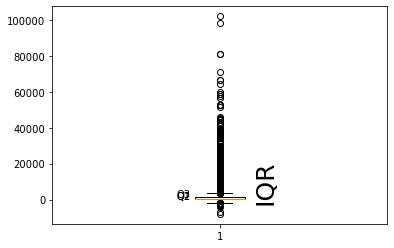

In [311]:
plt.boxplot(df['balance'])
plt.text(0.87,q1_balance,s='Q1')
plt.text(0.87,q2_balance,s='Q2')
plt.text(0.87,q3_balance,s='Q3')
plt.text(1.1,15,s='IQR',rotation= 90,size =25)
plt.show()

In [312]:
iqr = q3_balance-q1_balance
iqr

1356.0

In [313]:
lb_balance = q1_balance - 1.5*iqr
ub_balance = q3_balance + 1.5*iqr

In [314]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(df['balance'])
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(outliers)
#print("Outliers from IQR method: ", sample_outliers)

In [315]:
outliers = []
df1 = sorted(df['balance'])
for i in df1:
     if (i<lb_balance or i>ub_balance):
            outliers.append(i)   
len(outliers)

4729

In [316]:
# Trimming
for i in sample_outliers:
    a = np.delete(outliers, np.where(outliers==i))
print(a)
len(a)

[ -8019  -6847  -4057 ...  81204  98417 102127]


4729

In [317]:
q1_balance = df['balance'].quantile(0.25)
q2_balance = df['balance'].quantile(0.5)
q3_balance = df['balance'].quantile(0.75)
# Upper bound
upper = np.where(df['balance'] >= (q3_balance+1.5*iqr))
# Lower bound
lower = np.where(df['balance'] <= (q1_balance-1.5*iqr))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

New Shape:  (40480, 17)


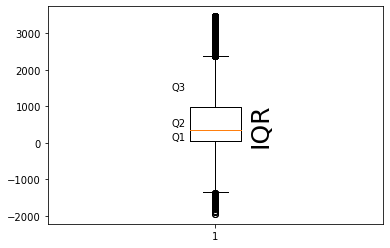

In [318]:
plt.boxplot(df['balance'])
plt.text(0.87,q1_balance,s='Q1')
plt.text(0.87,q2_balance,s='Q2')
plt.text(0.87,q3_balance,s='Q3')
plt.text(1.1,15,s='IQR',rotation= 90,size =25)
plt.show()

<AxesSubplot:>

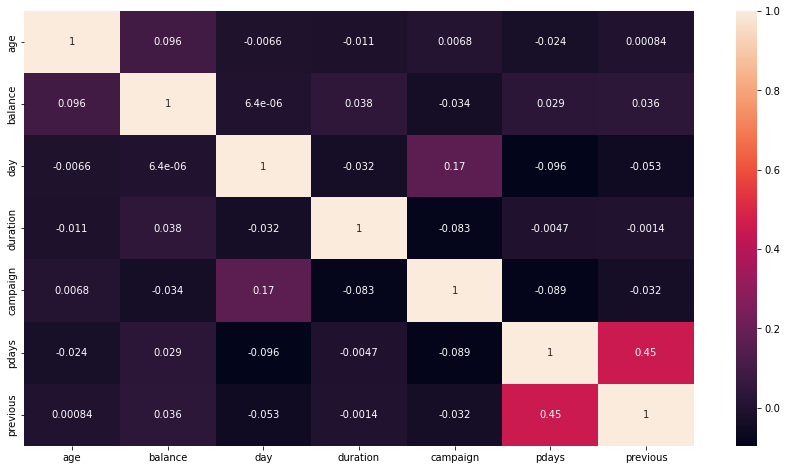

In [319]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot =True)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40480 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40480 non-null  int64 
 1   job        40480 non-null  object
 2   marital    40480 non-null  object
 3   education  40480 non-null  object
 4   default    40480 non-null  object
 5   balance    40480 non-null  int64 
 6   housing    40480 non-null  object
 7   loan       40480 non-null  object
 8   contact    40480 non-null  object
 9   day        40480 non-null  int64 
 10  month      40480 non-null  object
 11  duration   40480 non-null  int64 
 12  campaign   40480 non-null  int64 
 13  pdays      40480 non-null  int64 
 14  previous   40480 non-null  int64 
 15  poutcome   40480 non-null  object
 16  y          40480 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.6+ MB


In [321]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [322]:
df.shape

(40480, 17)

In [283]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45205    1
45206    1
45207    1
45209    0
45210    0
Name: y, Length: 40480, dtype: int64

In [282]:
y.replace('no', 0 ,inplace = True)
y.replace('yes', 1 ,inplace = True)
y

0        0
1        0
2        0
3        0
4        0
        ..
45205    1
45206    1
45207    1
45209    0
45210    0
Name: y, Length: 40480, dtype: int64

In [323]:
##Model building
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=37,stratify = y)

In [324]:
Transform  = X_train[['balance','age']]

In [325]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled= scaler.fit_transform(Transform.to_numpy())
df1 = pd.DataFrame(df_scaled , columns = ['balance','age'])    
X_train.drop(['balance','age'], axis = 1, inplace = True)
X_train = pd.concat([X_train,df1],axis = 1)
#df2.head()

In [328]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#for i not in 
X_std = sc.fit_transform(X)
X1 = pd.DataFrame(X_std,columns = X.columns)

In [326]:
print(X_train.shape, X_test.shape)

(43267, 51) (12144, 51)


In [291]:
#l1 = X_train.columns
#l2 = X_test.columns
#l = []
#for i in l2:
    #if i not in l1:
        #l.append(i)
#l        

['age', 'balance']

In [288]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28336 entries, 42296 to 44436
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   day                  28336 non-null  int64
 1   duration             28336 non-null  int64
 2   campaign             28336 non-null  int64
 3   pdays                28336 non-null  int64
 4   previous             28336 non-null  int64
 5   job_admin.           28336 non-null  uint8
 6   job_blue-collar      28336 non-null  uint8
 7   job_entrepreneur     28336 non-null  uint8
 8   job_housemaid        28336 non-null  uint8
 9   job_management       28336 non-null  uint8
 10  job_retired          28336 non-null  uint8
 11  job_self-employed    28336 non-null  uint8
 12  job_services         28336 non-null  uint8
 13  job_student          28336 non-null  uint8
 14  job_technician       28336 non-null  uint8
 15  job_unemployed       28336 non-null  uint8
 16  job_unknown       

In [289]:
y_train

42296    1
37200    0
17281    0
26373    0
20581    0
        ..
29969    0
17323    0
6047     0
24438    0
44436    1
Name: y, Length: 28336, dtype: int64

In [331]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score,classification_report, recall_score, precision_score

import statsmodels.api as sm
Xc = sm.add_constant(X)
model = sm.OLS(y,Xc).fit()
model.summary()

/Users/vivek/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     417.5
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:21:28   Log-Likelihood:                -3386.5
No. Observations:               40480   AIC:                             6859.
Df Residuals:                   40437   BIC:                             7229.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0360      0.003     12.179      0.000       0.030       0.042
age                  7.048e-05      0.000      0.433      0.665      -0.000       0.000
balance                1.1e-05    1.6e-06      6.853      0.000    7.85e-06    1.41e-05
day                     0.0009      0.000      4.803      0.000       0.001       0.001
duration                0.0005   5.17e-06     90.638      0.000       0.000       0.000
campaign               -0.0014      0.000     -3.209      0.001      -0.002      -0.001
pdays               -6.387e-05   2.84e-05     -2.252      0.024      -0.000   -8.28e-06
previous                0.0013      0.001      1.990      0.047    2.01e-05       0.003
job_admin.              0.0066      0.004      1.559      0.119      -0.002       0.015
job_blue-collar        -0.0097      0.004     -2.660      0.008      -0.017      -0.003
job_entrepreneur       -0.0191      0.007     -2.721      0.007      -0.033      -0.005
job_housemaid          -0.0239      0.008     -3.074      0.002      -0.039      -0.009
job_management         -0.0044      0.004     -1.078      0.281      -0.012       0.004
job_retired             0.0373      0.007      5.604      0.000       0.024       0.050
job_self-employed      -0.0146      0.007     -2.116      0.034      -0.028      -0.001
job_services           -0.0046      0.005     -1.007      0.314      -0.014       0.004
job_student             0.0820      0.009      9.084      0.000       0.064       0.100
job_technician         -0.0044      0.004     -1.175      0.240      -0.012       0.003
job_unemployed          0.0102      0.007      1.364      0.173      -0.004       0.025
job_unknown            -0.0193      0.016     -1.229      0.219      -0.050       0.011
marital_divorced        0.0136      0.003      4.238      0.000       0.007       0.020
marital_married         0.0015      0.002      0.671      0.502      -0.003       0.006
marital_single          0.0209      0.002      8.873      0.000       0.016       0.026
education_primary      -0.0020      0.004     -0.573      0.567      -0.009       0.005
education_secondary     0.0065      0.003      2.551      0.011       0.002       0.012
education_tertiary      0.0231      0.003      6.984      0.000       0.017       0.030
education_unknown       0.0084      0.005      1.594      0.111      -0.002       0.019
default_no              0.0146      0.004      3.331      0.001       0.006       0.023
default_yes             0.0214      0.005      3.885      0.000       0.011       0.032
housing_no              0.0425      0.002     19.433      0.000       0.038       0.047
housing_yes            -0.0065      0.002     -3.026      0.002      -0.011      -0.002
loan_no                 0.0289      0.002     12.988      0.000       0.025       0.033
loa

In [205]:
X = df.drop('y',axis=1)
y = df['y']

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


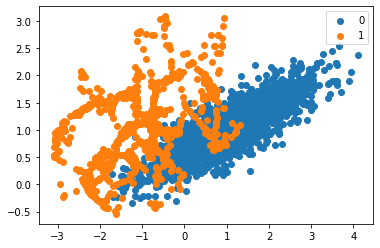

In [172]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [210]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40480 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40480 non-null  int64 
 1   job        40480 non-null  object
 2   marital    40480 non-null  object
 3   education  40480 non-null  object
 4   default    40480 non-null  object
 5   balance    40480 non-null  int64 
 6   housing    40480 non-null  object
 7   loan       40480 non-null  object
 8   contact    40480 non-null  object
 9   day        40480 non-null  int64 
 10  month      40480 non-null  object
 11  duration   40480 non-null  int64 
 12  campaign   40480 non-null  int64 
 13  pdays      40480 non-null  int64 
 14  previous   40480 non-null  int64 
 15  poutcome   40480 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.3+ MB


In [206]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [211]:
X = pd.get_dummies(X,columns = ["job","marital",'education',
                                'default','housing','loan','contact','month','poutcome'])

In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=37,stratify = y)

In [222]:
###Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)

y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)


print("Accuracy",accuracy_score(y_train,y_train_pred))
#print("AUC train", roc_auc_score(y_train,y_train_prob))
print("F1 train", f1_score(y_train,y_train_pred,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred))
#print("AUC test",roc_auc_score(y_test,y_test_prob,multi_class = "ovo"))
print("F1 test",f1_score(y_test,y_test_pred,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred,average = 'weighted'))

Accuracy 0.9999647092038396
F1 train 0.9999647067663201
recall 0.9999647092038396
Precision 0.9999647106058258


Accuracy 0.9083498023715415
F1 test 0.897719147300419
recall 0.9083498023715415
Precision 0.8958116515691262


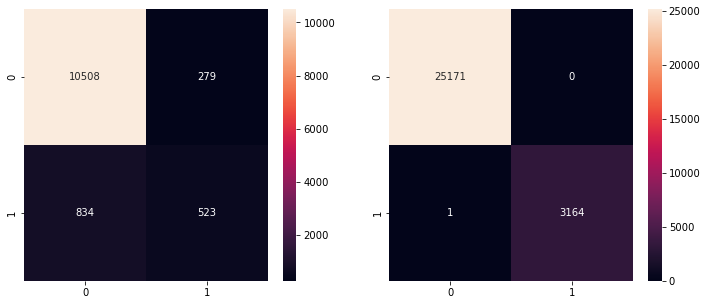

In [223]:
fig,axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,y_test_pred),fmt = 'd',annot = True, ax = axes[0])
sns.heatmap(confusion_matrix(y_train,y_train_pred),fmt = 'd',annot = True,ax = axes[1])
#plt.savefig("Logistic median.png")
plt.show()

In [226]:
# Feature selection with best features
best_features = pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['value'])
b = list(best_features[best_features['value'] >0].index)
X_best = X[b]

In [227]:
print("X best shape: ", X_best.shape)
print("X shape: ", X.shape)

X best shape:  (40480, 51)
X shape:  (40480, 51)


In [231]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_best,y,test_size = 0.3, random_state = 42, stratify = y)

In [232]:
## RandomForest with Randomized search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=6, random_state = 1001, shuffle = True )
param_rf = {
    'n_estimators': sp_randint(50, 200),
    'max_features': sp_randint(1, 14),
    'max_depth': sp_randint(2, 10),
    'min_samples_leaf': sp_randint(1, 20),
    'min_samples_split': sp_randint(2, 20)}

rsearch_rf = RandomizedSearchCV(rf, param_distributions=param_rf, scoring=['f1_weighted','precision_weighted'], n_iter=100,
                            cv=skf.split(X_train1,y_train1), n_jobs=-1, return_train_score=True, refit = 'f1_weighted')

rsearch_rf.fit(X_train1, y_train1)

/Users/vivek/anaconda3/lib/python3.8/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[  58   48   41 ...   46   54   46]
 [ 602  386  943 ...   51 2950  410]
 [  13   27   29 ...   15   11   21]
 ...
 [   1    5    3 ...    1    2    5]
 [  -1   -1   -1 ...   -1   -1   -1]
 [   0    0    0 ...    0    0    0]] loaded from the file /var/folders/sl/b3l2_ns501zd9v9wbmk8rx380000gn/T/joblib_memmapping_folder_835_1a9fe77d5cdd449897c2cc48a0c83cfa_917b81ff8a724dfaa27ad493c0af264b/835-140253956128144-6a25d2d253d048978c81b3b0f0fbecb1.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/vivek/anaconda3/lib/python3.8/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0 0 0 ... 0 0 0]
 [1 0 

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f8f6b38ba50>,
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f67b38c10>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f65a227c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f67b38400>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f69e5b430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f677bcfa0>},
                   refit='f1_weighted', return_train_score=True,
                   scoring=['f1_weighted', 'precision_weighted'])

In [233]:
rsearch_rf.best_params_

{'max_depth': 9,
 'max_features': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 168}

In [234]:
rf = RandomForestClassifier(**rsearch_rf.best_params_, oob_score=True,  random_state=3)

rf.fit(X_train1, y_train1)

y_train_pred_rf1 = rf.predict(X_train1)
y_train_prob_rf1 = rf.predict_proba(X_train1)

y_test_pred_rf1 = rf.predict(X_test1)
y_test_prob_rf1 = rf.predict_proba(X_test1)


print("Accuracy",accuracy_score(y_train1,y_train_pred_rf1))
#print("AUC train", roc_auc_score(y_train1,y_train_prob_rf1, multi_class = "ovo"))
print("F1 train", f1_score(y_train1,y_train_pred_rf1,average = 'weighted'))
print("recall",recall_score(y_train1,y_train_pred_rf1,average = 'weighted'))
print("Precision",precision_score(y_train1,y_train_pred_rf1,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test1,y_test_pred_rf1))
#print("AUC test",roc_auc_score(y_test1,y_test_prob_rf1,multi_class = "ovo"))
print("F1 test",f1_score(y_test1,y_test_pred_rf1,average = 'weighted'))
print("recall",recall_score(y_test1,y_test_pred_rf1,average = 'weighted'))
print("Precision",precision_score(y_test1,y_test_pred_rf1,average = 'weighted'))

Accuracy 0.9234189723320159
F1 train 0.9104831221008276
recall 0.9234189723320159
Precision 0.9182590956796318


Accuracy 0.9068675889328063
F1 test 0.8907417166699473
recall 0.9068675889328063
Precision 0.8925142509400704


In [235]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
scoring = {'accuracy' : make_scorer(accuracy_score)}
model = RandomForestClassifier(**rsearch_rf.best_params_, oob_score=True,  random_state=3)
resultsr = cross_validate(model, X_test1, y_test1, cv=10, scoring = scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(resultsr['test_accuracy']), np.std(resultsr['test_accuracy']) * 2))
resultsr

Accuracy: 0.91 (+/- 0.01)


{'fit_time': array([2.21585798, 2.05509591, 2.02712798, 2.06851697, 2.02577806,
        2.03980184, 2.15613103, 2.04152799, 2.04694033, 2.03147912]),
 'score_time': array([0.03978705, 0.03860998, 0.03883505, 0.03941607, 0.03885794,
        0.03914118, 0.03959203, 0.03927898, 0.0393877 , 0.04043317]),
 'test_accuracy': array([0.91193416, 0.90699588, 0.9127572 , 0.89958848, 0.90115321,
        0.90197694, 0.90362438, 0.90939044, 0.907743  , 0.90691928])}

In [237]:
### Decision Tree

In [238]:
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
dt = dct()
dt.fit(X_train,y_train)
y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)
y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)
print("Accuracy",accuracy_score(y_train,y_train_pred))
#print("AUC train", roc_auc_score(y_train,y_train_prob, multi_class = "ovo"))
print("F1 train", f1_score(y_train,y_train_pred,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred))
#print("AUC test",roc_auc_score(y_test,y_test_prob,multi_class = "ovo"))
print("F1 test",f1_score(y_test,y_test_pred,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred,average = 'weighted'))

Accuracy 1.0
F1 train 1.0
recall 1.0
Precision 1.0


Accuracy 0.8756587615283268
F1 test 0.8767919984107938
recall 0.8756587615283268
Precision 0.8779818016266191


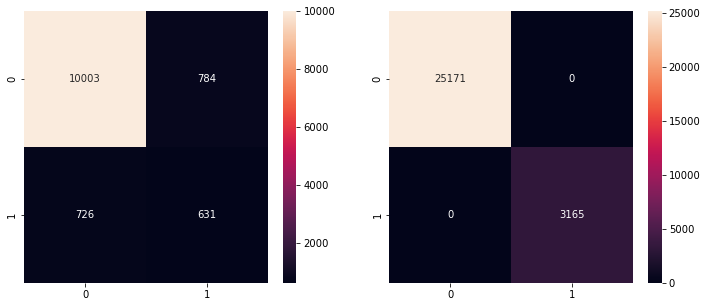

/Users/vivek/anaconda3/lib/python3.8/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0 0 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]] loaded from the file /var/folders/sl/b3l2_ns501zd9v9wbmk8rx380000gn/T/joblib_memmapping_folder_835_1a9fe77d5cdd449897c2cc48a0c83cfa_917b81ff8a724dfaa27ad493c0af264b/835-140253956128144-0bfaeb55831047809cb00fb5dbf02f36.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/vivek/anaconda3/lib/python3.8/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[  58   48   41 ...   46   54   46]
 [ 602  386  943 ...   51 2950  410]
 [  13   27   29 ...   15   11   21]
 ...
 [   1    5    3 

In [239]:
fig,axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,y_test_pred),fmt = 'd',annot = True, ax = axes[0])
sns.heatmap(confusion_matrix(y_train,y_train_pred),fmt = 'd',annot = True,ax = axes[1])
#plt.savefig("Logistic median.png")
plt.show()

In [240]:
###Decision Tree with Grid search

In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='weighted')
dt = dct(random_state = 3)
params = {"max_depth": [6,8,10,12,14,16], 'min_samples_split':[2,4,6,8,10,12],'min_samples_leaf':[1,2,4,6]}

gsearch_dt = GridSearchCV(dt,param_grid=params, cv = 6,scoring = ['f1_weighted','precision_weighted'],return_train_score=True,n_jobs = -1, refit = 'f1_weighted')

gsearch_dt.fit(X,y)
gsearch_dt.best_params_

/Users/vivek/anaconda3/lib/python3.8/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[  58   44   33 ...   71   57   37]
 [2143   29    2 ... 1729  668 2971]
 [   5    5    5 ...   17   17   17]
 ...
 [   1    1    1 ...    2    4    2]
 [  -1   -1   -1 ...   -1   -1  188]
 [   0    0    0 ...    0    0   11]] loaded from the file /var/folders/sl/b3l2_ns501zd9v9wbmk8rx380000gn/T/joblib_memmapping_folder_835_1a9fe77d5cdd449897c2cc48a0c83cfa_291c0f3e893b4652983dccd503553043/835-140253956128144-f55373646ec44250bb6a1a8aede0728e.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/vivek/anaconda3/lib/python3.8/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0 0 0 ... 0 0 0]
 [0 0 

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [243]:
from sklearn.ensemble import BaggingClassifier
dt = dct(max_depth = 19, min_samples_leaf = 6, min_samples_split = 2)
bc = BaggingClassifier(base_estimator=dt, n_estimators=2000, random_state=1, oob_score=True)
dt.fit(X_train,y_train)
y_train_pred_dt = dt.predict(X_train)
y_train_prob_dt = dt.predict_proba(X_train)
y_test_pred_dt = dt.predict(X_test)
y_test_prob_dt = dt.predict_proba(X_test)
print("Accuracy",accuracy_score(y_train,y_train_pred_dt))
#print("AUC train", roc_auc_score(y_train,y_train_prob_dt, multi_class = "ovo"))
print("F1 train", f1_score(y_train,y_train_pred_dt,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred_dt,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred_dt,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred_dt))
#print("AUC test",roc_auc_score(y_test,y_test_prob_dt,multi_class = "ovo"))
print("F1 test",f1_score(y_test,y_test_pred_dt,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred_dt,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred_dt,average = 'weighted'))

Accuracy 0.9473814229249012


ValueError: y should be a 1d array, got an array of shape (28336, 2) instead.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
scoring = {'accuracy' : make_scorer(accuracy_score)}



model4 = dct(max_depth = 19, min_samples_leaf = 6, min_samples_split = 2)
results_dt = cross_validate(model4, X_test, y_test, cv=10, scoring = scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(results_dt['test_accuracy'])*100, np.std(results_dt['test_accuracy']) * 2))

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,y_test_pred_dt),fmt = 'd',annot = True, ax = axes[0])
sns.heatmap(confusion_matrix(y_train,y_train_pred_dt),fmt = 'd',annot = True,ax = axes[1])
plt.show()

/Users/vivek/anaconda3/lib/python3.8/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 0]] loaded from the file /var/folders/sl/b3l2_ns501zd9v9wbmk8rx380000gn/T/joblib_memmapping_folder_835_1a9fe77d5cdd449897c2cc48a0c83cfa_291c0f3e893b4652983dccd503553043/835-140253956128144-9706cde0e172464faa8da8a1f95dd8cd.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/vivek/anaconda3/lib/python3.8/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[  58   44   33 ...   71   57   37]
 [2143   29    2 ... 1729  668 2971]
 [   5    5    5 ...   17   17   17]
 ...
 [   1    1    1 